## Run MD with vanilla/og system and then check that difference in energies between vanilla vs hybrid system are close to 0

In [1]:
from tqdm import tqdm_notebook
import openmmtools
import matplotlib.pyplot as plt
import pickle

from simtk import openmm
from simtk.openmm import unit
import openmmtools
from openmmtools.states import SamplerState, ThermodynamicState, CompoundThermodynamicState
from openmmtools import cache
from openmmtools.constants import kB

from perses.annihilation.lambda_protocol import LambdaProtocol, RelativeAlchemicalState, RESTState, RESTCapableRelativeAlchemicalState, RESTCapableLambdaProtocol
from perses.dispersed import feptasks

import numpy as np

from perses.app.relative_point_mutation_setup import PointMutationExecutor


INFO:rdkit:Enabling RDKit 2021.03.4 jupyter extensions


## Generate htf

In [2]:
solvent_delivery = PointMutationExecutor("../../input/1brs_barstar_renumbered.pdb",
                        '1',
                        '42',
                        'ALA',
#                         ligand_input="../../input/1brs_barnase_renumbered.pdb",
                        forcefield_files=['amber14/protein.ff14SB.xml', 'amber14/tip3p.xml'],
                        ionic_strength=0.05*unit.molar,
                        rest_radius=0.2,
                        generate_unmodified_hybrid_topology_factory=True,
                        generate_rest_capable_hybrid_topology_factory=False,
                        conduct_endstate_validation=False,
                       )

DEBUG:openmmforcefields.system_generators:Trying GAFFTemplateGenerator to load gaff-2.11
INFO:setup:solvating at 0.05 M using tip3p
INFO:proposal_generator:	Conducting polymer point mutation proposal...
INFO:proposal_generator:local_atom_map: {669: 669, 670: 670, 671: 671, 672: 672, 673: 673, 674: 676, 675: 677}
INFO:proposal_generator:the mapped atom names are: [('N', 'N'), ('CA', 'CA'), ('C', 'C'), ('O', 'O'), ('CB', 'CB'), ('H', 'H'), ('HA', 'HA')]
INFO:setup:Changed particle 201's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 201's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 231's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 231's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 307's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 307's sigma from 1.0 nm to 0.1 nm
INFO:setup:Changed particle 486's epsilon from 0.0 kJ/mol to 0.0001 kJ/mol
INFO:setup:Changed particle 486's sigma from 1.0 nm to 0.1

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context new positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 3 new atoms
INFO:geometry:	reduced angle potential = 0.5945545378903309.
INFO:geometry:	reduced angle potential = 0.5641293702551271.
INFO:geometry:	reduced angle potential = 0.2261626494172101.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 733 bond forces in the no-nonbonded final system
INFO:geometry:	there are 2628 angle forces in the no-nonbonded final system
INFO:geometry:	there are 4943 torsion forces in the no-nonbonded final system
INFO:geometry:forward final system defined with 0 neglected angles.


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 2667.606655043375


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: 10.557583935694803
INFO:geometry:final reduced energy 2678.1642387072266
INFO:geometry:sum of energies: 2678.16423897907
INFO:geometry:magnitude of difference in the energies: 2.71843456189913e-07
INFO:geometry:Final logp_proposal: 21.531775331223205
INFO:geometry:logp_reverse: performing reverse proposal
INFO:geometry:logp_reverse: unique new atoms detected; proceeding to _logp_propose...
INFO:geometry:Conducting forward proposal...
INFO:geometry:Computing proposal order with NetworkX...
INFO:geometry:number of atoms to be placed: 7
INFO:geometry:Atom index proposal order is [674, 675, 679, 678, 680, 682, 681]
INFO:geometry:omitted_bonds: []
INFO:geometry:direction of proposal is reverse; creating atoms_with_positions from old system/topology


added energy components: [('CustomBondForce', 0.0), ('CustomAngleForce', 1.7696049093300759), ('CustomTorsionForce', 0.026586929494361623), ('CustomBondForce', 8.761392096870363)]


INFO:geometry:creating growth system...
INFO:geometry:	creating bond force...
INFO:geometry:	there are 735 bonds in reference force.
INFO:geometry:	creating angle force...
INFO:geometry:	there are 2635 angles in reference force.
INFO:geometry:	creating torsion force...
INFO:geometry:	creating extra torsions force...
INFO:geometry:	there are 4973 torsions in reference force.
INFO:geometry:	creating nonbonded force...
INFO:geometry:		grabbing reference nonbonded method, cutoff, switching function, switching distance...
INFO:geometry:		creating nonbonded exception force (i.e. custom bond for 1,4s)...
INFO:geometry:		looping through exceptions calculating growth indices, and adding appropriate interactions to custom bond force.
INFO:geometry:		there are 22480 in the reference Nonbonded force
INFO:geometry:Neglected angle terms : []
INFO:geometry:omitted_growth_terms: {'bonds': [], 'angles': [], 'torsions': [], '1,4s': []}
INFO:geometry:extra torsions: {0: (679, 674, 673, 670, [1, Quantity(

conducting subsequent work with the following platform: CUDA


INFO:geometry:setting atoms_with_positions context old positions


conducting subsequent work with the following platform: CUDA


INFO:geometry:There are 7 new atoms
INFO:geometry:	reduced angle potential = 1.1717867235443227.
INFO:geometry:	reduced angle potential = 0.15088552138282585.
INFO:geometry:	reduced angle potential = 0.0037318575268475676.
INFO:geometry:	reduced angle potential = 0.0009835018195185007.
INFO:geometry:	reduced angle potential = 6.103681872621702e-06.
INFO:geometry:	reduced angle potential = 8.429836390053187e-06.
INFO:geometry:	reduced angle potential = 2.0226598106735676e-06.
INFO:geometry:	beginning construction of no_nonbonded final system...
INFO:geometry:	initial no-nonbonded final system forces ['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat']
INFO:geometry:	final no-nonbonded final system forces dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce'])
INFO:geometry:	there are 735 bond forces in the no-nonbonded final system
INFO:geometry:	there are 2635 angle forces in the no-nonbonde

conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced potential before atom placement: 2667.6066550433757


conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA
conducting subsequent work with the following platform: CUDA


INFO:geometry:total reduced energy added from growth system: -60.958199568475365
INFO:geometry:final reduced energy 2606.648455666519
INFO:geometry:sum of energies: 2606.6484554749004
INFO:geometry:magnitude of difference in the energies: 1.9161880970841594e-07
INFO:geometry:Final logp_proposal: -7080.344775037623
INFO:setup:charge diff: 0
INFO:relative:*** Generating vanilla HybridTopologyFactory ***
INFO:relative:Beginning nonbonded method, total particle, barostat, and exceptions retrieval...


added energy components: [('CustomBondForce', 0.33407521838716286), ('CustomAngleForce', 1.7019045529067363), ('CustomTorsionForce', 10.252126980649416), ('CustomBondForce', -73.24630632041867)]


INFO:relative:Old system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:New system forces: dict_keys(['HarmonicBondForce', 'HarmonicAngleForce', 'PeriodicTorsionForce', 'NonbondedForce', 'MonteCarloBarostat'])
INFO:relative:No unknown forces.
INFO:relative:Nonbonded method to be used (i.e. from old system): 4
INFO:relative:Adding and mapping old atoms to hybrid system...
INFO:relative:Adding and mapping new atoms to hybrid system...
INFO:relative:Added MonteCarloBarostat.
INFO:relative:getDefaultPeriodicBoxVectors added to hybrid: [Quantity(value=Vec3(x=5.564, y=0.0, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=5.564, z=0.0), unit=nanometer), Quantity(value=Vec3(x=0.0, y=0.0, z=5.564), unit=nanometer)]
INFO:relative:Determined atom classes.
INFO:relative:Generating old system exceptions dict...
INFO:relative:Generating new system exceptions dict...
INFO:relative:Handling constraints..

In [3]:
# pickle.dump(solvent_delivery.get_complex_htf(), open("bnbs_complex.pickle", "wb" ))
pickle.dump(solvent_delivery.get_apo_htf(), open("bnbs_apo_vanilla.pickle", "wb" ))


## Test at lambda = 0

In [2]:
# htf = solvent_delivery.get_apo_htf()
with open("bnbs_apo_vanilla.pickle", "rb") as f:
    htf = pickle.load(f)
hybrid_system = htf.hybrid_system
hybrid_positions = htf.hybrid_positions
box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()


In [3]:
htf.hybrid_system.getForces()


[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2b918259f330> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2b918259f5d0> >,
 <openmm.openmm.HarmonicBondForce; proxy of <Swig Object of type 'OpenMM::HarmonicBondForce *' at 0x2b918259f7b0> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2b918259f960> >,
 <openmm.openmm.HarmonicAngleForce; proxy of <Swig Object of type 'OpenMM::HarmonicAngleForce *' at 0x2b920b692cf0> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2b920b692e10> >,
 <openmm.openmm.PeriodicTorsionForce; proxy of <Swig Object of type 'OpenMM::PeriodicTorsionForce *' at 0x2b920b692ea0> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2b920b692f30> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of t

In [4]:
# Create thermodynamic state
lambda_protocol = LambdaProtocol()
lambda_alchemical_state = RelativeAlchemicalState.from_system(hybrid_system)
lambda_alchemical_state.set_alchemical_parameters(0, lambda_protocol)
compound_thermodynamic_state = CompoundThermodynamicState(ThermodynamicState(hybrid_system, temperature=300 * unit.kelvin), composable_states=[lambda_alchemical_state])


In [5]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [6]:
for k, v in context.getParameters().items():
    print(k, v)

MonteCarloPressure 1.01325
MonteCarloTemperature 300.0
lambda_angles 0.0
lambda_bonds 0.0
lambda_electrostatics_core 0.0
lambda_electrostatics_delete 0.0
lambda_electrostatics_insert 0.0
lambda_sterics_core 0.0
lambda_sterics_delete 0.0
lambda_sterics_insert 0.0
lambda_torsions 0.0
softcore_alpha 0.85


In [7]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [8]:
# Run MD
hybrid = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
    pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
    hybrid.append(pos)


/scratch/lsftmp/4137623.tmpdir/ipykernel_44874/2861022740.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

In [9]:
with open("hybrid_positions_bnbs_vanilla.pickle", "wb") as f:
    pickle.dump(hybrid, f)
    

In [9]:
with open("hybrid_positions_bnbs_vanilla.pickle", "rb") as f:
    hybrid = pickle.load(f)
    

In [ ]:
htf.get

In [14]:
T_min = 300 * unit.kelvin

# Make context for og system
thermodynamic_state = ThermodynamicState(htf._topology_proposal.old_system, temperature=T_min)
integrator_og = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_og = thermodynamic_state.create_context(integrator_og)


# Zero the unique old/new valence in the hybrid system
bond_force_index = 1 
angle_force_index = 3
torsion_force_index = 5
custom_bond_force = hybrid_system.getForce(bond_force_index)
custom_angle_force = hybrid_system.getForce(angle_force_index)
custom_torsion_force = hybrid_system.getForce(torsion_force_index)
is_old = True
# hybrid_to_bond_indices = htf._hybrid_to_new_bond_indices if is_old else htf._hybrid_to_old_bond_indices
# hybrid_to_angle_indices = htf._hybrid_to_new_angle_indices if is_old else htf._hybrid_to_old_angle_indices
# hybrid_to_torsion_indices = htf._hybrid_to_new_torsion_indices if is_old else htf._hybrid_to_old_torsion_indices
for hybrid_idx in range(custom_bond_force.getNumBonds()):
    p1, p2, hybrid_params = custom_bond_force.getBondParameters(hybrid_idx)
    if p1 in htf._atom_classes['unique_new_atoms'] or p2 in htf._atom_classes['unique_new_atoms']:
        hybrid_params = list(hybrid_params)
        hybrid_params[-3] *= 0 # zero K_old
        hybrid_params[-1] *= 0 # zero K_new
        custom_bond_force.setBondParameters(hybrid_idx, p1, p2, hybrid_params)
for hybrid_idx in range(custom_angle_force.getNumAngles()):
    p1, p2, p3, hybrid_params = custom_angle_force.getAngleParameters(hybrid_idx)
    if p1 in htf._atom_classes['unique_new_atoms'] or p2 in htf._atom_classes['unique_new_atoms'] or p3 in htf._atom_classes['unique_new_atoms']:
        hybrid_params = list(hybrid_params)
        hybrid_params[-1] *= 0
        hybrid_params[-3] *= 0
        custom_angle_force.setAngleParameters(hybrid_idx, p1, p2, p3, hybrid_params)
for hybrid_idx in range(custom_torsion_force.getNumTorsions()):
    p1, p2, p3, p4, hybrid_params = custom_torsion_force.getTorsionParameters(hybrid_idx)
    if p1 in htf._atom_classes['unique_new_atoms'] or p2 in htf._atom_classes['unique_new_atoms'] or p3 in htf._atom_classes['unique_new_atoms']  or p4 in htf._atom_classes['unique_new_atoms']:
        hybrid_params = list(hybrid_params)
        hybrid_params[-1] *= 0
        hybrid_params[-4] *= 0
        custom_torsion_force.setTorsionParameters(hybrid_idx, p1, p2, p3, p4, hybrid_params)

# Make context for hybrid system
lambda_protocol = LambdaProtocol()
lambda_alchemical_state = RelativeAlchemicalState.from_system(hybrid_system)
lambda_alchemical_state.set_alchemical_parameters(0, lambda_protocol)
compound_thermodynamic_state = CompoundThermodynamicState(ThermodynamicState(hybrid_system, temperature=300 * unit.kelvin), composable_states=[lambda_alchemical_state])

integrator_hybrid = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_hybrid = compound_thermodynamic_state.create_context(integrator_hybrid)

# Get energies for each conformation
energies_og = list()
energies_hybrid = list()
for pos in tqdm_notebook(hybrid):
   
    context_og.setPositions(htf.old_positions(pos))
    energy_og = context_og.getState(getEnergy=True).getPotentialEnergy()
    energies_og.append(energy_og.value_in_unit_system(unit.md_unit_system))
    
    context_hybrid.setPositions(pos)
    energy_hybrid = context_hybrid.getState(getEnergy=True).getPotentialEnergy()
    energies_hybrid.append(energy_hybrid.value_in_unit_system(unit.md_unit_system))
    
    print(energy_og, energy_hybrid)

/scratch/lsftmp/4137623.tmpdir/ipykernel_44874/2584440712.py:58: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pos in tqdm_notebook(hybrid):


  0%|          | 0/500 [00:00<?, ?it/s]

-223752.46319932002 kJ/mol -223714.9173635867 kJ/mol
-215322.65069932002 kJ/mol -215288.4486135867 kJ/mol
-210596.96319932002 kJ/mol -210560.6673635867 kJ/mol
-208301.33819932002 kJ/mol -208269.3704885867 kJ/mol
-204380.90069932002 kJ/mol -204345.4798635867 kJ/mol
-203591.71319932002 kJ/mol -203558.7767385867 kJ/mol
-199585.77569932002 kJ/mol -199554.0267385867 kJ/mol
-196576.77569932002 kJ/mol -196535.8392385867 kJ/mol
-195126.33819932002 kJ/mol -195088.3704885867 kJ/mol
-197320.08819932002 kJ/mol -197279.4954885867 kJ/mol
-123583.33819932002 kJ/mol -123552.80798858669 kJ/mol
-162872.33819932002 kJ/mol -162838.0892385867 kJ/mol
-155980.65069932002 kJ/mol -155943.6829885867 kJ/mol
-180522.83819932002 kJ/mol -180486.8704885867 kJ/mol
-70964.33819932002 kJ/mol -70923.33923858669 kJ/mol
444457.91180068 kJ/mol 444491.72326141334 kJ/mol
-52603.96319932002 kJ/mol -52570.90173858668 kJ/mol
-40804.33819932002 kJ/mol -40770.41736358668 kJ/mol
48042.28680067998 kJ/mol 48073.17638641332 kJ/mol
-9

487955.16180068 kJ/mol 487992.03576141334 kJ/mol
-139470.40069932002 kJ/mol -139433.2142385867 kJ/mol
-169807.71319932002 kJ/mol -169771.5736135867 kJ/mol
-120889.27569932002 kJ/mol -120849.37048858669 kJ/mol
-138711.77569932002 kJ/mol -138668.0579885867 kJ/mol
-65143.46319932002 kJ/mol -65106.64001983668 kJ/mol
-178849.77569932002 kJ/mol -178815.3392385867 kJ/mol
-172780.46319932002 kJ/mol -172748.1204885867 kJ/mol
-166946.58819932002 kJ/mol -166915.6829885867 kJ/mol
-155306.21319932002 kJ/mol -155276.1829885867 kJ/mol
-108494.27569932002 kJ/mol -108463.09705108669 kJ/mol
3377.4118006799836 kJ/mol 3408.6607614133163 kJ/mol
-59680.21319932002 kJ/mol -59641.55798858668 kJ/mol
-140085.83819932002 kJ/mol -140054.7142385867 kJ/mol
-116848.46319932002 kJ/mol -116809.06580108669 kJ/mol
-152423.71319932002 kJ/mol -152393.0736135867 kJ/mol
1064681.91180068 kJ/mol 1064713.1607614134 kJ/mol
-155584.96319932002 kJ/mol -155555.5267385867 kJ/mol
1323089.41180068 kJ/mol 1323124.7857614134 kJ/mol
-94

KeyboardInterrupt: 

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneral.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager

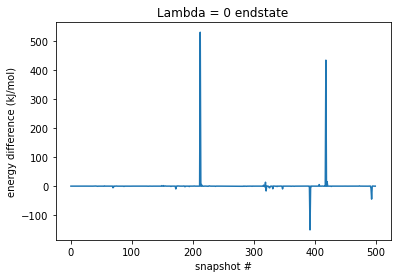

In [16]:
plt.plot(np.array(energies_og) - np.array(energies_hybrid))
plt.ylabel("energy difference (kJ/mol)")
plt.xlabel("snapshot #")
plt.title("Lambda = 0 endstate")
plt.show()

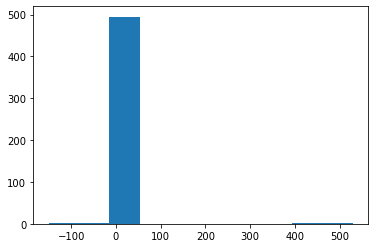

In [12]:
plt.hist(np.array(energies_og) - np.array(energies_hybrid))
plt.show()

In [13]:
np.mean(np.array(energies_og) - np.array(energies_hybrid))

1.4672221947348243

In [14]:
np.std(np.array(energies_og) - np.array(energies_hybrid))

31.398627388187617

In [18]:
for i, (energy_og, energy_hybrid) in enumerate(zip(energies_og, energies_hybrid)):
    if energy_og - energy_hybrid > 0.15:
        print(i, energy_og - energy_hybrid, energy_og, energy_hybrid)

40 0.3823354759369977 408235.66180068 408235.27946520405
41 0.41358547587879 1060803.41180068 1060802.998215204
55 0.9135854756459594 5750468.91180068 5750467.998215204
75 0.47608547587879 915989.41180068 915988.9357152041
120 0.16358547587879002 1720692.66180068 1720692.498215204
149 1.78858547587879 1048467.16180068 1048465.3732152041
152 1.78858547587879 1700591.41180068 1700589.623215204
155 0.72608547587879 622109.41180068 622108.6857152041
167 0.4135854759369977 92604.16180067998 92603.74821520405
175 0.6635854756459594 2395801.4118006798 2395800.748215204
176 0.4135854756459594 3043310.6618006798 3043310.248215204
185 0.5698354759369977 427130.53680068 427129.96696520405
202 0.6635854756459594 2248677.9118006798 2248677.248215204
207 0.47608547587879 719591.91180068 719591.4357152041
212 529.4135854840279 399280815.4118007 399280285.9982152
214 5.663585475645959 2569485.9118006798 2569480.248215204
220 0.22608547593699768 292959.66180068 292959.43571520405
226 0.3823354759369977

In [19]:
with open("energies_bnbs_hybrid.pickle", "wb") as f:
    pickle.dump(energies_hybrid, f)
with open("energies_bnbs_og.pickle", "wb") as f:
    pickle.dump(energies_og, f)

## Test at lambda = 1

In [32]:
# htf = solvent_delivery.get_apo_htf()
with open("bnbs_apo.pickle", "rb") as f:
    htf = pickle.load(f)
hybrid_system = htf.hybrid_system
hybrid_positions = htf.hybrid_positions
box_vectors = hybrid_system.getDefaultPeriodicBoxVectors()


In [33]:
htf.hybrid_system.getForces()

[<openmm.openmm.MonteCarloBarostat; proxy of <Swig Object of type 'OpenMM::MonteCarloBarostat *' at 0x2ba99111e5a0> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2ba99111ea80> >,
 <openmm.openmm.CustomAngleForce; proxy of <Swig Object of type 'OpenMM::CustomAngleForce *' at 0x2ba99111eae0> >,
 <openmm.openmm.CustomTorsionForce; proxy of <Swig Object of type 'OpenMM::CustomTorsionForce *' at 0x2ba99111e450> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2ba997801f30> >,
 <openmm.openmm.CustomNonbondedForce; proxy of <Swig Object of type 'OpenMM::CustomNonbondedForce *' at 0x2ba99bb46ea0> >,
 <openmm.openmm.CustomBondForce; proxy of <Swig Object of type 'OpenMM::CustomBondForce *' at 0x2ba99bb469c0> >,
 <openmm.openmm.NonbondedForce; proxy of <Swig Object of type 'OpenMM::NonbondedForce *' at 0x2ba99bb467b0> >]

In [34]:
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

# Create thermodynamic state
lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

# Set alchemical parameters
beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 1
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

print(compound_thermodynamic_state.lambda_rest_bonds)
print(compound_thermodynamic_state.lambda_alchemical_bonds_old)
print(compound_thermodynamic_state.lambda_alchemical_bonds_new)


1.0
0.0
1.0


In [35]:
integrator = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin, 
                                    collision_rate=1 / unit.picoseconds, 
                                    timestep=4 * unit.femtoseconds)
context = compound_thermodynamic_state.create_context(integrator)
context.setPositions(hybrid_positions)
context.setPeriodicBoxVectors(*box_vectors)
context.setVelocitiesToTemperature(300 * unit.kelvin)


In [36]:
# Minimize
openmm.LocalEnergyMinimizer.minimize(context)


In [37]:
# Run MD
hybrid = list()
for _ in tqdm_notebook(range(int(125000/250))):
    integrator.step(250)
    pos = context.getState(getPositions=True, enforcePeriodicBox=False).getPositions(asNumpy=True)
    hybrid.append(pos)


/scratch/lsftmp/4055528.tmpdir/ipykernel_68104/2861022740.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for _ in tqdm_notebook(range(int(125000/250))):


  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [38]:
with open("hybrid_positions_bnbs_lambda_1.pickle", "wb") as f:
    pickle.dump(hybrid, f)

In [39]:
with open("hybrid_positions_bnbs_lambda_1.pickle", "rb") as f:
    hybrid = pickle.load(f)

In [40]:
# Make context for og system
thermodynamic_state = ThermodynamicState(htf._topology_proposal.new_system, temperature=T_min)
integrator_og = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_og = thermodynamic_state.create_context(integrator_og)


# Zero the unique old/new valence in the hybrid system
bond_force_index = 1 
angle_force_index = 2 
torsion_force_index = 3 
custom_bond_force = hybrid_system.getForce(bond_force_index)
custom_angle_force = hybrid_system.getForce(angle_force_index)
custom_torsion_force = hybrid_system.getForce(torsion_force_index)
is_old = False
hybrid_to_bond_indices = htf._hybrid_to_new_bond_indices if is_old else htf._hybrid_to_old_bond_indices
hybrid_to_angle_indices = htf._hybrid_to_new_angle_indices if is_old else htf._hybrid_to_old_angle_indices
hybrid_to_torsion_indices = htf._hybrid_to_new_torsion_indices if is_old else htf._hybrid_to_old_torsion_indices
for hybrid_idx, idx in hybrid_to_bond_indices.items():
    p1, p2, hybrid_params = custom_bond_force.getBondParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-2] *= 0 # zero K_old
    hybrid_params[-1] *= 0 # zero K_new
    custom_bond_force.setBondParameters(hybrid_idx, p1, p2, hybrid_params)
for hybrid_idx, idx in hybrid_to_angle_indices.items():
    p1, p2, p3, hybrid_params = custom_angle_force.getAngleParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_angle_force.setAngleParameters(hybrid_idx, p1, p2, p3, hybrid_params)
for hybrid_idx, idx in hybrid_to_torsion_indices.items():
    p1, p2, p3, p4, hybrid_params = custom_torsion_force.getTorsionParameters(hybrid_idx)
    hybrid_params = list(hybrid_params)
    hybrid_params[-1] *= 0
    hybrid_params[-2] *= 0
    custom_torsion_force.setTorsionParameters(hybrid_idx, p1, p2, p3, p4, hybrid_params)

# Make context for hybrid system
T_min = 300 * unit.kelvin
T_max = 600 * unit.kelvin

lambda_protocol = RESTCapableLambdaProtocol()
lambda_zero_alchemical_state = RESTCapableRelativeAlchemicalState.from_system(hybrid_system)
thermostate = ThermodynamicState(hybrid_system, temperature=T_min)
compound_thermodynamic_state = CompoundThermodynamicState(thermostate,
                                                          composable_states=[lambda_zero_alchemical_state])

beta_0 = 1 / (kB * T_min)
beta_m = 1 / (kB * T_max)
global_lambda = 1
compound_thermodynamic_state.set_alchemical_parameters(global_lambda, beta_0, beta_m, lambda_protocol=lambda_protocol)

integrator_hybrid = openmmtools.integrators.LangevinIntegrator(temperature=300 * unit.kelvin,
                                          collision_rate=1 / unit.picoseconds,
                                          timestep= 4 * unit.femtoseconds)
context_hybrid = compound_thermodynamic_state.create_context(integrator_hybrid)

# Get energies for each conformation
energies_og = list()
energies_hybrid = list()
for pos in tqdm_notebook(hybrid):
   
    context_og.setPositions(htf.new_positions(pos))
    energy_og = context_og.getState(getEnergy=True).getPotentialEnergy()
    energies_og.append(energy_og.value_in_unit_system(unit.md_unit_system))
    
    context_hybrid.setPositions(pos)
    energy_hybrid = context_hybrid.getState(getEnergy=True).getPotentialEnergy()
    energies_hybrid.append(energy_hybrid.value_in_unit_system(unit.md_unit_system))
    
    print(energy_og, energy_hybrid)

/scratch/lsftmp/4055528.tmpdir/ipykernel_68104/280257880.py:62: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for pos in tqdm_notebook(hybrid):


  0%|          | 0/305 [00:00<?, ?it/s]

-221694.7456467396 kJ/mol -221694.73548905272 kJ/mol
-211725.31481193344 kJ/mol -211725.3058160422 kJ/mol
-204706.11665310804 kJ/mol -204706.10540276518 kJ/mol
-202700.83425680758 kJ/mol -202700.82383068604 kJ/mol
-196606.49615696643 kJ/mol -196606.48470694848 kJ/mol
-197616.13048806123 kJ/mol -197616.11771871796 kJ/mol
-186135.2830104679 kJ/mol -186135.2638664839 kJ/mol
-183800.95875915326 kJ/mol -183800.94419391 kJ/mol
-192300.89874743577 kJ/mol -192300.88779800758 kJ/mol
-152128.73923751386 kJ/mol -152128.70435730962 kJ/mol
-134841.51576933544 kJ/mol -134841.4914230942 kJ/mol
-183804.68814478524 kJ/mol -183804.67176592955 kJ/mol
-153579.64448392915 kJ/mol -153579.6056516871 kJ/mol
-150497.97859704762 kJ/mol -150497.9468932719 kJ/mol
-122801.57385003078 kJ/mol -122801.53211841389 kJ/mol
-188351.74930905714 kJ/mol -188351.73874250386 kJ/mol
-176533.65272227535 kJ/mol -176533.63088270923 kJ/mol
-155144.8990328433 kJ/mol -155144.8590595901 kJ/mol
-169596.1274662069 kJ/mol -169596.103466

-96758.57218651404 kJ/mol -96758.42130436243 kJ/mol
-149354.47325140226 kJ/mol -149354.4525934388 kJ/mol
-165949.67116358294 kJ/mol -165949.65119400318 kJ/mol
124540.51657795231 kJ/mol 124540.64017668 kJ/mol
-94261.93780458823 kJ/mol -94261.8284561319 kJ/mol
-121480.62321181793 kJ/mol -121480.59075900995 kJ/mol
-133593.6396700982 kJ/mol -133593.59997457272 kJ/mol
-182379.2098648831 kJ/mol -182379.20003256295 kJ/mol
-136513.0067682024 kJ/mol -136512.97720573182 kJ/mol
-74478.01769164228 kJ/mol -74477.98693931321 kJ/mol
-124173.13728974038 kJ/mol -124173.11326298033 kJ/mol
-70379.63567598048 kJ/mol -70379.56608178119 kJ/mol
-54402.55049429205 kJ/mol -54402.51080707967 kJ/mol
-138081.8467627276 kJ/mol -138081.81161888398 kJ/mol
-130867.62797095766 kJ/mol -130867.57028854005 kJ/mol
-126518.55901321722 kJ/mol -126518.51114191693 kJ/mol
-177956.45782075007 kJ/mol -177956.4426688265 kJ/mol
5166236.764589908 kJ/mol 5166236.844185673 kJ/mol
4004312.1145135676 kJ/mol 4004314.3019207167 kJ/mol
12

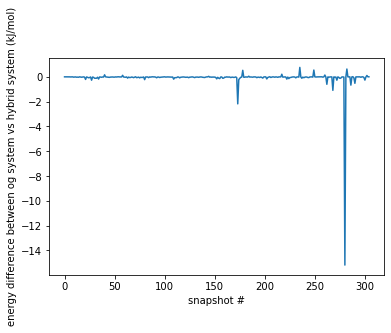

In [41]:
plt.plot(np.array(energies_og) - np.array(energies_hybrid))
plt.ylabel("energy difference between og system vs hybrid system (kJ/mol)")
plt.xlabel("snapshot #")
plt.show()

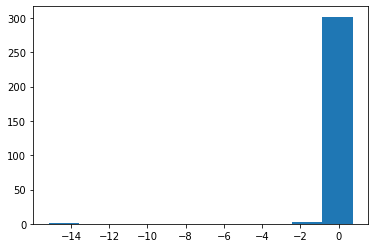

In [42]:
plt.hist(np.array(energies_og) - np.array(energies_hybrid))
plt.show()

In [23]:
diff = np.array(energies_og) - np.array(energies_hybrid)
diff[112]

-2.3724230397492647

In [29]:
diff[51]

-0.707159933866933

In [24]:
np.array(energies_og)[112], np.array(energies_hybrid)[112]

(8270022.855682447, 8270025.228105486)

In [30]:
np.array(energies_og)[51], np.array(energies_hybrid)[51]

(1376561.5401569547, 1376562.2473168885)

In [18]:
print(np.array(energies_og) - np.array(energies_hybrid))


[-0.01346908 -0.01067229 -0.01012315 -0.01221986 -0.00812304 -0.01459526
  0.01919606 -0.01974559 -0.03170726 -0.01377402 -0.01205406 -0.01659078
 -0.02664336 -0.01950886 -0.03504796 -0.01287016 -0.01482397 -0.01139997
 -0.05752246 -0.02414044 -0.02344317 -0.01241196 -0.13138499 -0.02416543
 -0.02663405 -0.03321857 -0.09940147 -0.02394162 -0.01827952 -0.01390322
 -0.01808958 -0.02705217 -0.01365297 -0.02384317 -0.02002375 -0.02534276
 -0.00549805 -0.0137345  -0.01805166 -0.10861181 -0.0662268  -0.05789296
 -0.05039494 -0.01586104 -0.03626614 -0.01795644 -0.01645997  0.10541786
 -0.09289358 -0.02308618 -0.17948118 -0.70715993 -0.01611057 -0.02530045
 -0.03263536 -0.05590057 -0.10972033 -0.21062642 -0.02024341  0.05777151
  0.20990809 -0.08555084 -0.02138034 -0.09679643 -0.0376456  -0.01579891
 -0.05797013 -0.01890206  0.01205472 -0.12387628 -0.02031007 -0.02964002
 -0.07108696 -0.02557722 -0.02469062 -0.05634577 -0.00856514 -0.19180412
 -0.03634591 -0.02043421 -0.06927997 -0.04028461 -0

In [27]:
np.std(np.array(energies_og) - np.array(energies_hybrid))

0.005789720133556094

In [28]:
with open("energies_bnbs_hybrid_lambda_1.pickle", "wb") as f:
    pickle.dump(energies_hybrid, f)
with open("energies_bnbs_og_lambda_1.pickle", "wb") as f:
    pickle.dump(energies_og, f)